In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
from google.colab import files
upload = files.upload()

Saving Expanded_data_with_more_features.csv to Expanded_data_with_more_features.csv


In [38]:
for filename in upload.keys():
  new_filename = "student_data.csv"

  import os
  os.rename(filename,new_filename)

In [39]:
df = pd.read_csv( r'/content/student_data.csv' , encoding='unicode_escape' )


In [40]:
df.head(15)

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
5,5,female,group B,associate's degree,standard,none,married,regularly,yes,1.0,school_bus,5 - 10,73,84,79
6,6,female,group B,some college,standard,completed,widowed,never,no,1.0,private,5 - 10,85,93,89
7,7,male,group B,some college,free/reduced,none,married,sometimes,yes,1.0,private,> 10,41,43,39
8,8,male,group D,high school,free/reduced,completed,single,sometimes,no,3.0,private,> 10,65,64,68
9,9,female,group B,high school,free/reduced,none,married,regularly,yes,NaN,private,< 5,37,59,50


In [41]:
df.shape

(30641, 15)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [43]:
missing_values =df.isnull().sum()
print(missing_values)

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64


Drop irrelevent index containing missing values

In [44]:
# Drop the 'ParentMaritalStatus' and 'ParentEduc' columns
df.drop(columns=['ParentMaritalStatus', 'ParentEduc'], inplace=True)

# Recheck if any missing data remains
missing_values = df.isnull().sum()


Unnamed: 0           0
Gender               0
EthnicGroup       1840
LunchType            0
TestPrep          1830
PracticeSport      631
IsFirstChild       904
NrSiblings        1572
TransportMeans    3134
WklyStudyHours     955
MathScore            0
ReadingScore         0
WritingScore         0
dtype: int64


In [50]:
print(missing_values)


Unnamed: 0           0
Gender               0
EthnicGroup       1840
LunchType            0
TestPrep          1830
PracticeSport      631
IsFirstChild       904
NrSiblings        1572
TransportMeans    3134
WklyStudyHours     955
MathScore            0
ReadingScore         0
WritingScore         0
dtype: int64


In [49]:
df.head(15)

,Unnamed: 0,Gender,EthnicGroup,LunchType,TestPrep,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,group C,standard,none,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,standard,none,sometimes,yes,0.0,school_bus,5 - 10,69,90,88
2,2,female,group B,standard,none,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,free/reduced,none,never,no,1.0,school_bus,5 - 10,45,56,42
4,4,male,group C,standard,none,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
5,5,female,group B,standard,none,regularly,yes,1.0,school_bus,5 - 10,73,84,79
6,6,female,group B,standard,completed,never,no,1.0,private,5 - 10,85,93,89
7,7,male,group B,free/reduced,none,sometimes,yes,1.0,private,> 10,41,43,39
8,8,male,group D,free/reduced,completed,sometimes,no,3.0,private,> 10,65,64,68
9,9,female,group B,free/reduced,none,regularly,yes,NaN,private,< 5,37,59,50


### **Mean, Median, Mode in Handling Missing Data**

- **Mean**: Average value, used for filling missing numerical data when data is symmetrically distributed.
- **Median**: Middle value in sorted data, best for numerical data with outliers or skewed distribution.
- **Mode**: Most frequent value, ideal for filling missing categorical data.

In [48]:
# List of columns to fill with mode
columns_to_fill = ['EthnicGroup', 'TestPrep', 'PracticeSport', 'TransportMeans']

# Fill missing values for each column in the list
for column in columns_to_fill:
    mode_value = df[column].mode()[0]
    df[column].fillna(mode_value, inplace=True)


In [51]:
# Recheck if any missing data remains
missing_values_after_filling = df.isnull().sum()
print(missing_values_after_filling)

Unnamed: 0           0
Gender               0
EthnicGroup          0
LunchType            0
TestPrep             0
PracticeSport        0
IsFirstChild       904
NrSiblings        1572
TransportMeans       0
WklyStudyHours     955
MathScore            0
ReadingScore         0
WritingScore         0
dtype: int64


In [52]:
df['IsFirstChild'].fillna(df['IsFirstChild'].mode()[0], inplace=True)
df['NrSiblings'].fillna(df['NrSiblings'].median(), inplace=True)


In [53]:
# Recheck if any missing data remains
missing_values_after_filling = df.isnull().sum()
print(missing_values_after_filling)

Unnamed: 0          0
Gender              0
EthnicGroup         0
LunchType           0
TestPrep            0
PracticeSport       0
IsFirstChild        0
NrSiblings          0
TransportMeans      0
WklyStudyHours    955
MathScore           0
ReadingScore        0
WritingScore        0
dtype: int64


In [57]:

df['WklyStudyHours'].fillna(df['WklyStudyHours'].mode()[0], inplace=True)


In [58]:
# Recheck if any missing data remains
missing_values_after_filling = df.isnull().sum()
print(missing_values_after_filling)

Unnamed: 0        0
Gender            0
EthnicGroup       0
LunchType         0
TestPrep          0
PracticeSport     0
IsFirstChild      0
NrSiblings        0
TransportMeans    0
WklyStudyHours    0
MathScore         0
ReadingScore      0
WritingScore      0
dtype: int64


In [59]:
df.head(15)

,Unnamed: 0,Gender,EthnicGroup,LunchType,TestPrep,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,group C,standard,none,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,standard,none,sometimes,yes,0.0,school_bus,5 - 10,69,90,88
2,2,female,group B,standard,none,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,free/reduced,none,never,no,1.0,school_bus,5 - 10,45,56,42
4,4,male,group C,standard,none,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
5,5,female,group B,standard,none,regularly,yes,1.0,school_bus,5 - 10,73,84,79
6,6,female,group B,standard,completed,never,no,1.0,private,5 - 10,85,93,89
7,7,male,group B,free/reduced,none,sometimes,yes,1.0,private,> 10,41,43,39
8,8,male,group D,free/reduced,completed,sometimes,no,3.0,private,> 10,65,64,68
9,9,female,group B,free/reduced,none,regularly,yes,2.0,private,< 5,37,59,50


In [61]:
df.dtypes

,0
Unnamed: 0,int64
Gender,object
EthnicGroup,object
LunchType,object
TestPrep,object
PracticeSport,object
IsFirstChild,object
NrSiblings,float64
TransportMeans,object
WklyStudyHours,object


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      30641 non-null  int64  
 1   Gender          30641 non-null  object 
 2   EthnicGroup     30641 non-null  object 
 3   LunchType       30641 non-null  object 
 4   TestPrep        30641 non-null  object 
 5   PracticeSport   30641 non-null  object 
 6   IsFirstChild    30641 non-null  object 
 7   NrSiblings      30641 non-null  float64
 8   TransportMeans  30641 non-null  object 
 9   WklyStudyHours  30641 non-null  object 
 10  MathScore       30641 non-null  int64  
 11  ReadingScore    30641 non-null  int64  
 12  WritingScore    30641 non-null  int64  
dtypes: float64(1), int64(4), object(8)
memory usage: 3.0+ MB


**DROP UNNAMED COLUMN**

In [63]:

df.drop('Unnamed: 0', axis=1, inplace=True)


In [65]:
print(df.head(15))

    Gender EthnicGroup     LunchType   TestPrep PracticeSport IsFirstChild  \
0   female     group C      standard       none     regularly          yes   
1   female     group C      standard       none     sometimes          yes   
2   female     group B      standard       none     sometimes          yes   
3     male     group A  free/reduced       none         never           no   
4     male     group C      standard       none     sometimes          yes   
5   female     group B      standard       none     regularly          yes   
6   female     group B      standard  completed         never           no   
7     male     group B  free/reduced       none     sometimes          yes   
8     male     group D  free/reduced  completed     sometimes           no   
9   female     group B  free/reduced       none     regularly          yes   
10    male     group C      standard       none     sometimes          yes   
11    male     group D      standard       none     sometimes   

In [66]:
df.describe()

,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,30641.000000,30641.000000,30641.000000
mean,2.138409,66.558402,69.377533,68.418622
std,1.420707,15.361616,14.758952,15.443525
min,0.000000,0.000000,10.000000,4.000000
25%,1.000000,56.000000,59.000000,58.000000
50%,2.000000,67.000000,70.000000,69.000000
75%,3.000000,78.000000,80.000000,79.000000
max,7.000000,100.000000,100.000000,100.000000


# **Gender Distribution**

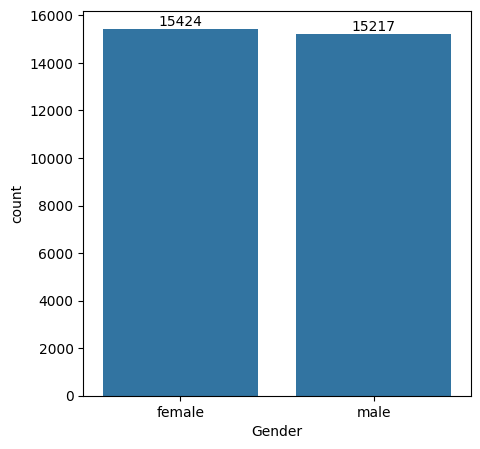

In [79]:
plt.figure(figsize=(5,5)) #sizefixing
ax=sns.countplot(data =df,x="Gender") #exact counts label
ax.bar_label(ax.containers[0])
plt.show()

In [ ]:
#from the above analysis we can see the number of females are higher than the males

In [79]:
# Calculate the mean scores for each subject
mean_scores = df[['MathScore', 'ReadingScore', 'WritingScore']].mean()

# Create a bar plot to compare the mean scores
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=mean_scores.index, y=mean_scores.values, palette='Set2')

# Add labels to the bars
ax.bar_label(ax.containers[0])

# Set the title and labels
plt.title('Comparison of Average Scores in Different Subjects')
plt.xlabel('Subjects')
plt.ylabel('Average Score')

# Display the plot
plt.show()

In [80]:
#average scores for each subject

avg_scores = df[['MathScore','ReadingScore','WritingScore']].mean()
print(avg_scores)

MathScore       66.558402
ReadingScore    69.377533
WritingScore    68.418622
dtype: float64


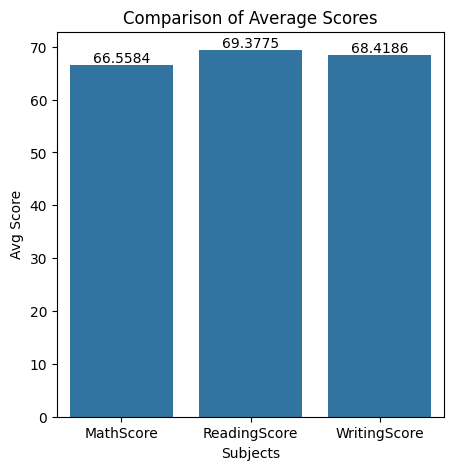

In [84]:
#create a bar plot

plt.figure(figsize=(5,5))
ax = sns.barplot(x=avg_scores.index,y=avg_scores.values)
ax.bar_label(ax.containers[0])
plt.title("Comparison of Average Scores")
plt.xlabel("Subjects")
plt.ylabel("Avg Score")
plt.show()


In [85]:
gb = df.groupby('Gender').agg({'MathScore': 'mean', 'ReadingScore': 'mean', 'WritingScore': 'mean'})
print(gb)

        MathScore  ReadingScore  WritingScore
Gender                                       
female  64.080654     72.853216     72.856457
male    69.069856     65.854571     63.920418


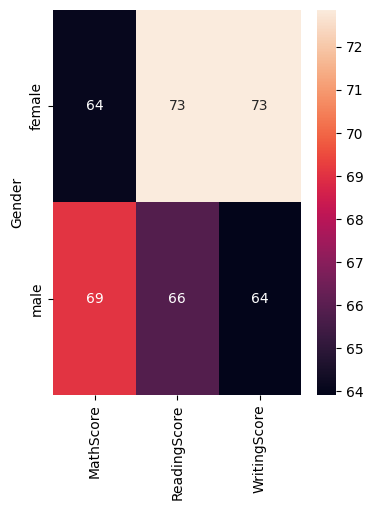

In [90]:
plt.figure(figsize=(4,5))
sns.heatmap(gb,annot=True)
plt.show ()

In [ ]:
#males tend to do well in math compared to female
#on the other hand females outperformed males interms of reading and writing

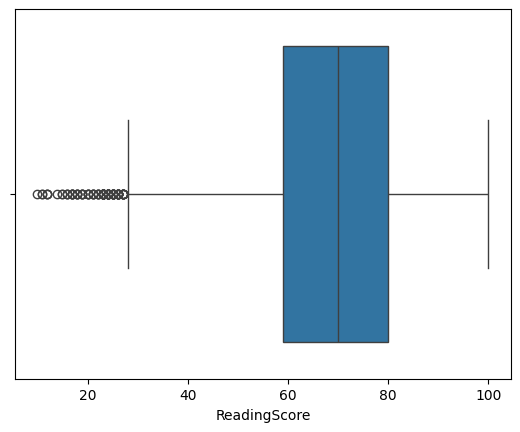

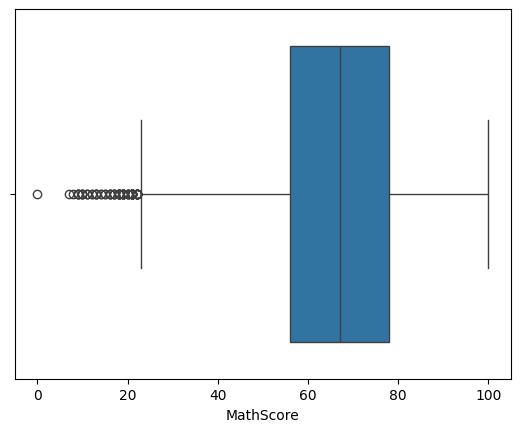

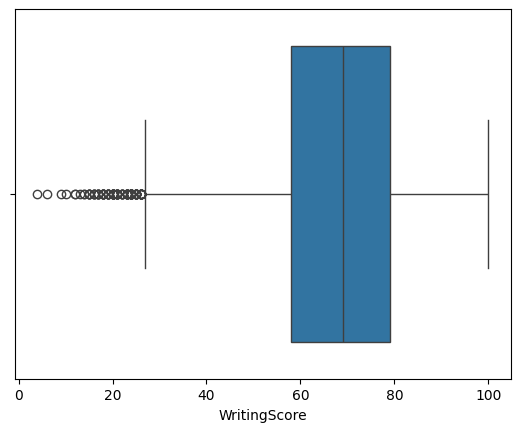

In [94]:
sns.boxplot(data =df,x="ReadingScore")
plt.show()
sns.boxplot(data =df,x="MathScore")
plt.show()

sns.boxplot(data =df,x="WritingScore")
plt.show()

In [ ]:
#As we can see Math is the difficult subject tend to other subjects

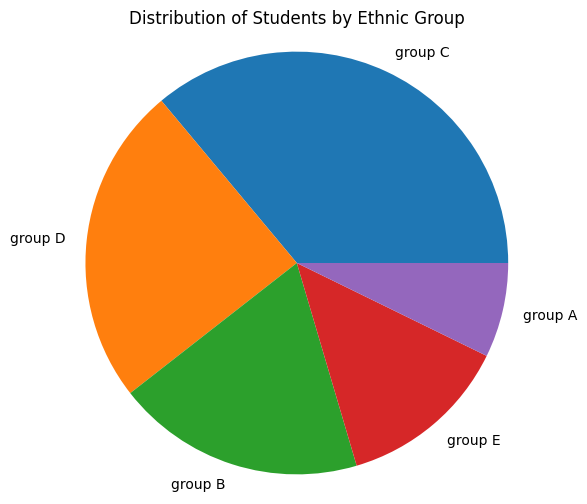

In [110]:
#import matplotlib.pyplot as plt

# Count the number of students in each ethnic group
group_counts = df['EthnicGroup'].value_counts()

# Labels for the pie chart
l = group_counts.index.tolist()

# Values for the pie chart
mlist = group_counts.values.tolist()

# Plotting the pie chart
plt.figure(figsize=(6, 6))
plt.pie(mlist, labels=l) #, autopct='%1.1f%%', startangle=140

# Display the plot
plt.title('Distribution of Students by Ethnic Group')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle
plt.show()


In [ ]:
#Group C has the most number of students